In [157]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [158]:
data = pd.read_csv('./bodyfat.csv')
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [159]:
data.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [160]:
X = data.drop('BodyFat', axis=1).values
y = data['BodyFat'].values

In [161]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## modeling

In [163]:
from sklearn.linear_model import Ridge

np.random.seed(42)

ridge = Ridge().fit(X_train, y_train)
ridge.score(X_test, y_test)

0.8916355443946723

In [164]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

rf = RandomForestRegressor().fit(X_train, y_train)
rf.score(X_test, y_test)

0.8931496053011112

In [165]:
# 100 estimators
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
rf.score(X_test, y_test)

0.8962798023530191

In [166]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.8895361656800416

In [167]:
from sklearn.linear_model import Lasso

la = Lasso().fit(X_train, y_train)
la.score(X_test, y_test)

0.9455808150534558

In [178]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor().fit(X_train, y_train)
knn.score(X_test, y_test)

0.8103099356577006

In [179]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor().fit(X_train, y_train)
dt.score(X_test, y_test)

0.8258994078194284

## feature importance

In [180]:
la.coef_

array([-7.40780602,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.17802867,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [181]:
feature_importance = dict(zip(data.columns, list(la.coef_)))
feature_importance

{'Density': -7.40780601956307,
 'BodyFat': 0.0,
 'Age': 0.0,
 'Weight': -0.0,
 'Height': 0.0,
 'Neck': 0.0,
 'Chest': 0.17802867435953626,
 'Abdomen': 0.0,
 'Hip': 0.0,
 'Thigh': 0.0,
 'Knee': 0.0,
 'Ankle': 0.0,
 'Biceps': 0.0,
 'Forearm': 0.0}

<AxesSubplot:title={'center':'Feature Importance (Ridge)'}>

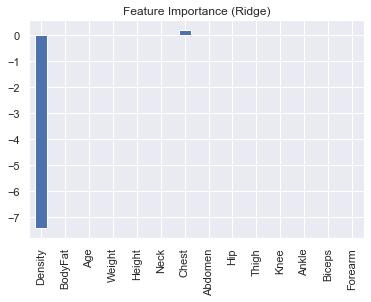

In [182]:
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot.bar(title="Feature Importance (Ridge)", legend=False)

In [183]:
rf.feature_importances_

array([9.80727880e-01, 9.06718261e-04, 1.79905858e-03, 3.42581406e-03,
       1.18004904e-03, 1.39802317e-03, 3.17224621e-03, 9.87060861e-04,
       9.06283583e-04, 2.63029663e-03, 2.89641952e-04, 3.55442878e-04,
       7.54614497e-04, 1.46687063e-03])

In [184]:
feature_importance = dict(zip(data.columns, list(rf.feature_importances_)))
feature_importance

{'Density': 0.980727879658587,
 'BodyFat': 0.0009067182612386728,
 'Age': 0.0017990585792660814,
 'Weight': 0.003425814057417531,
 'Height': 0.0011800490355276228,
 'Neck': 0.0013980231676499128,
 'Chest': 0.0031722462054550866,
 'Abdomen': 0.0009870608606560346,
 'Hip': 0.0009062835830795982,
 'Thigh': 0.0026302966301097355,
 'Knee': 0.0002896419523440783,
 'Ankle': 0.00035544287846712725,
 'Biceps': 0.0007546144967477327,
 'Forearm': 0.0014668706334538778}

<AxesSubplot:title={'center':'Feature Importance (RandomForest)'}>

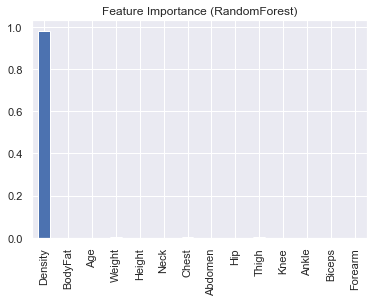

In [185]:
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot.bar(title="Feature Importance (RandomForest)", legend=False)

In [186]:
y_pred = la.predict(X_test)
y_pred, y_test

(array([20.91586808, 20.84599549, 30.41556535, 22.18804319, 17.98777319,
        12.88629304, 25.019786  , 20.24960828, 12.48146307, 12.77199389,
        28.43794684, 26.57990825, 15.98847704, 24.34030535,  6.29984399,
         5.01758626, 23.70894403, 22.66115772, 22.07056801, 14.88662266,
        16.03715091, 18.06403564, 14.95970908, 14.72154489, 23.26500609,
        32.93509971, 25.76445082, 16.14299325,  7.20109196, 14.07807182,
        27.0000638 , 10.21756106, 19.00332031, 20.0437589 , 20.37768281,
         3.23843161, 23.23110326, 17.31305658, 17.99733908, 12.25759101,
        14.80940236, 25.66174668, 33.69025045,  9.74651345, 14.87288508,
        24.34506939, 31.33845315, 23.14586727, 25.18490157, 10.36092336,
        38.46804057]),
 array([19.2, 19.2, 28. , 20.5, 16.7, 12.1, 23.6, 18.6, 11.7, 11.9, 26.1,
        24.5, 14.8, 22.5,  6.3,  5.3, 22. , 20.9, 20.4, 14. , 14.9, 16.5,
        13.9, 13.8, 21.3, 30.4, 23.6, 15. ,  7.1, 13. , 24.9,  9.6, 17.5,
        18.4, 18.7,  3.7,

In [187]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f" MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f" R2: {r2_score(y_test, y_pred):.2f}")
print(f" MAE: {mean_absolute_error(y_test, y_pred):.2f}") # rata-rata beda 4

 MSE: 2.53
 R2: 0.95
 MAE: 1.44
